# Multi-Class Classification with Perceptron

Lab Assignment from [AI for Beginners Curriculum](https://github.com/microsoft/ai-for-beginners).

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import random
#Carlos Berlin Arifin Take

You can use the following perceptron training code from the lecture:

In [4]:
def train(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # initialize weights

    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]

    report_frequency = 10

    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)

        if i % report_frequency == 0:
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            print("Iteration={}, pos correct={}, neg correct={}".format(i,pos_correct,neg_correct))

    return weights

In [5]:
def accuracy(weights, test_x, test_labels):
    res = np.dot(np.c_[test_x,np.ones(len(test_x))],weights)
    return (res.reshape(test_labels.shape)*test_labels>=0).sum()/float(len(test_labels))

# accuracy(wts, test_x, test_labels)

### Reading the Dataset

This code download the dataset from the repository on the internet. You can also manually copy the dataset from `/data` directory of AI Curriculum repo.

In [6]:
!wget https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
!gzip -d mnist.pkl.gz

--2025-09-24 14:50:19--  https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz [following]
--2025-09-24 14:50:20--  https://raw.githubusercontent.com/mnielsen/neural-networks-and-deep-learning/master/data/mnist.pkl.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17051982 (16M) [application/octet-stream]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  16.26M  --.-KB/s    in 0.04s   

2025-09-24 14:50:20 (410 MB/s) - 

In [7]:
import pickle

with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle, encoding='latin1')


First training image pixels (130:180):
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01171875 0.0703125
 0.0703125  0.0703125  0.4921875  0.53125    0.68359375 0.1015625
 0.6484375  0.99609375 0.96484375 0.49609375 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1171875  0.140625
 0.3671875  0.6015625 ]
First image label: 5


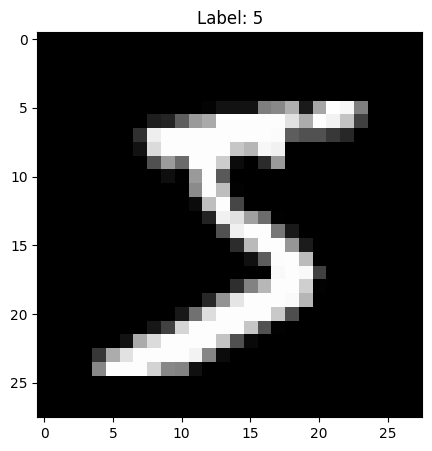

In [8]:
train_set, val_set, test_set = MNIST

# Unpack each set into images and labels
train_images, train_labels = train_set
val_images, val_labels = val_set
test_images, test_labels = test_set

# Now you can access the data correctly
print("First training image pixels (130:180):")
print(train_images[0][130:180])  # First image, pixels 130-180
print(f"First image label: {train_labels[0]}")

# Normalize the images (0-255 -> 0-1)
features = train_images.astype(np.float32) / 255.0
labels = train_labels

# Display an image
plt.figure(figsize=(10,5))
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

`[Code to create *one-vs-other* dataset for two-digit classification. You need to modify this code to create *one-vs-all* dateset.](https://)`

In [9]:
def set_mnist_pos_neg(positive_label):
    positive_indices = [i for i, label in enumerate(train_labels)
                          if label == positive_label]
    negative_indices = [i for i, label in enumerate(train_labels)
                          if label != positive_label]

    positive_images = train_images[positive_indices]
    negative_images = train_images[negative_indices]

    return positive_images, negative_images

# Usage example
positive_imgs, negative_imgs = set_mnist_pos_neg(positive_label=1)

print(f"Found {len(positive_imgs)} images of digit 1")
print(f"Found {len(negative_imgs)} images of all digit")

Found 5678 images of digit 1
Found 44322 images of all digit


Now you need to:
1. Create 10 *one-vs-all* datasets for all digits
1. Train 10 perceptrons
1. Define `classify` function to perform digit classification
1. Measure the accuracy of classification and print *confusion matrix*
1. [Optional] Create improved `classify` function that performs the classification using one matrix multiplication.

In [10]:
# one-vs-all datasets
datasets = {}
for i in range(10):
  positive_imgs, negative_imgs = set_mnist_pos_neg(positive_label=i)
  datasets[i] =(positive_imgs, negative_imgs)
  print(f"Digit {i}: {len(positive_imgs)} positive, {len(negative_imgs)} negative examples")

Digit 0: 4932 positive, 45068 negative examples
Digit 1: 5678 positive, 44322 negative examples
Digit 2: 4968 positive, 45032 negative examples
Digit 3: 5101 positive, 44899 negative examples
Digit 4: 4859 positive, 45141 negative examples
Digit 5: 4506 positive, 45494 negative examples
Digit 6: 4951 positive, 45049 negative examples
Digit 7: 5175 positive, 44825 negative examples
Digit 8: 4842 positive, 45158 negative examples
Digit 9: 4988 positive, 45012 negative examples


In [11]:
#Training 10 perceptron according to the dataset datasets
perceptrons = {}
for i in range(10):
  positive_imgs, negative_imgs = datasets[i]
  positive_normalized = positive_imgs.astype(np.float32) / 255.0
  negative_normalized = negative_imgs.astype(np.float32) / 255.0
  weights = train(positive_normalized, negative_normalized, num_iterations=200)
  perceptrons[i] = weights
  print(f"Perceptron for digit {i} trained successfully!")


Iteration=0, pos correct=0.0, neg correct=1.0
Iteration=10, pos correct=0.9209245742092458, neg correct=0.8524895713144581
Iteration=20, pos correct=0.8882806163828062, neg correct=0.8562616490636372
Iteration=30, pos correct=0.8801703163017032, neg correct=0.9145513446347742
Iteration=40, pos correct=0.9324817518248175, neg correct=0.9065856039762137
Iteration=50, pos correct=0.9854014598540146, neg correct=0.7229519836691222
Iteration=60, pos correct=0.9288321167883211, neg correct=0.9252019171030443
Iteration=70, pos correct=0.9620843471208435, neg correct=0.8900328392651105
Iteration=80, pos correct=0.9620843471208435, neg correct=0.8900328392651105
Iteration=90, pos correct=0.9620843471208435, neg correct=0.8900328392651105
Iteration=100, pos correct=0.8815896188158961, neg correct=0.9616357504215851
Iteration=110, pos correct=0.9876317923763179, neg correct=0.7902059110677199
Iteration=120, pos correct=0.9334955393349554, neg correct=0.9626120528978432
Iteration=130, pos correct=

In [18]:
#Define classify function to perform digit classification
def classify(image, perceptrons):
  normalized_img = image.astype(np.float32) / 255.0

  scores = []
  for i in range(10):
    score = np.dot(normalized_img, perceptrons[i]).flatten()[0]
    scores.append(score)
  predicted = np.argmax(scores)
  return predicted, scores

Classification Accuracy: 0.6852 (68.52%)
Correct predictions: 6852/10000

Confusion Matrix:
[[860   0  16  16   0  10  24   1  53   0]
 [  0 953   2   2   1  10   4   0 163   0]
 [  2   0 773  39   8   3  16   1 187   3]
 [  1   0  15 748   0  98   1   0 147   0]
 [  1   2  17  44 615  32  12   1 244  14]
 [ 16   0   6  84   1 517   8   2 257   1]
 [ 10   2  24  11   4  37 749   0 121   0]
 [ 14  19  47  61  24   9   1 547 280  26]
 [  4   0   3  30   1  28   4   1 903   0]
 [  3   5  26  47  31  21   4  11 674 187]]


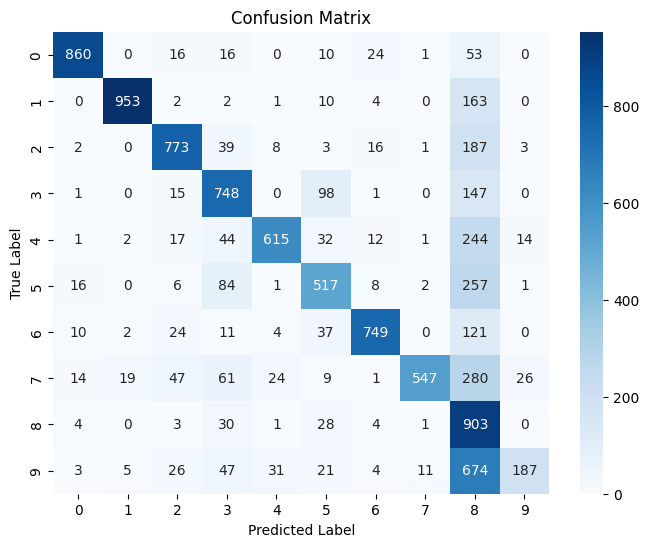

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Measure accuracy using your existing accuracy function
test_images_normalized = test_images.astype(np.float32) / 255.0

# Get predictions for all test images
y_true = test_labels
y_pred = []

for i in range(len(test_images)):
    predicted, scores = classify(test_images[i], perceptrons)
    y_pred.append(predicted)

y_pred = np.array(y_pred)

# Calculate accuracy (using your method)
correct_predictions = (y_pred == y_true).sum()
total_predictions = len(y_true)
accuracy = correct_predictions / total_predictions

print(f"Classification Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Correct predictions: {correct_predictions}/{total_predictions}")

# 2. Print confusion matrix
cm = confusion_matrix(y_true, y_pred)

print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()